In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,Not Potable
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,Not Potable
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,Not Potable
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,Not Potable
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,Not Potable


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   object 
dtypes: float64(9), object(1)
memory usage: 256.1+ KB


In [5]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.duplicated().sum()

0

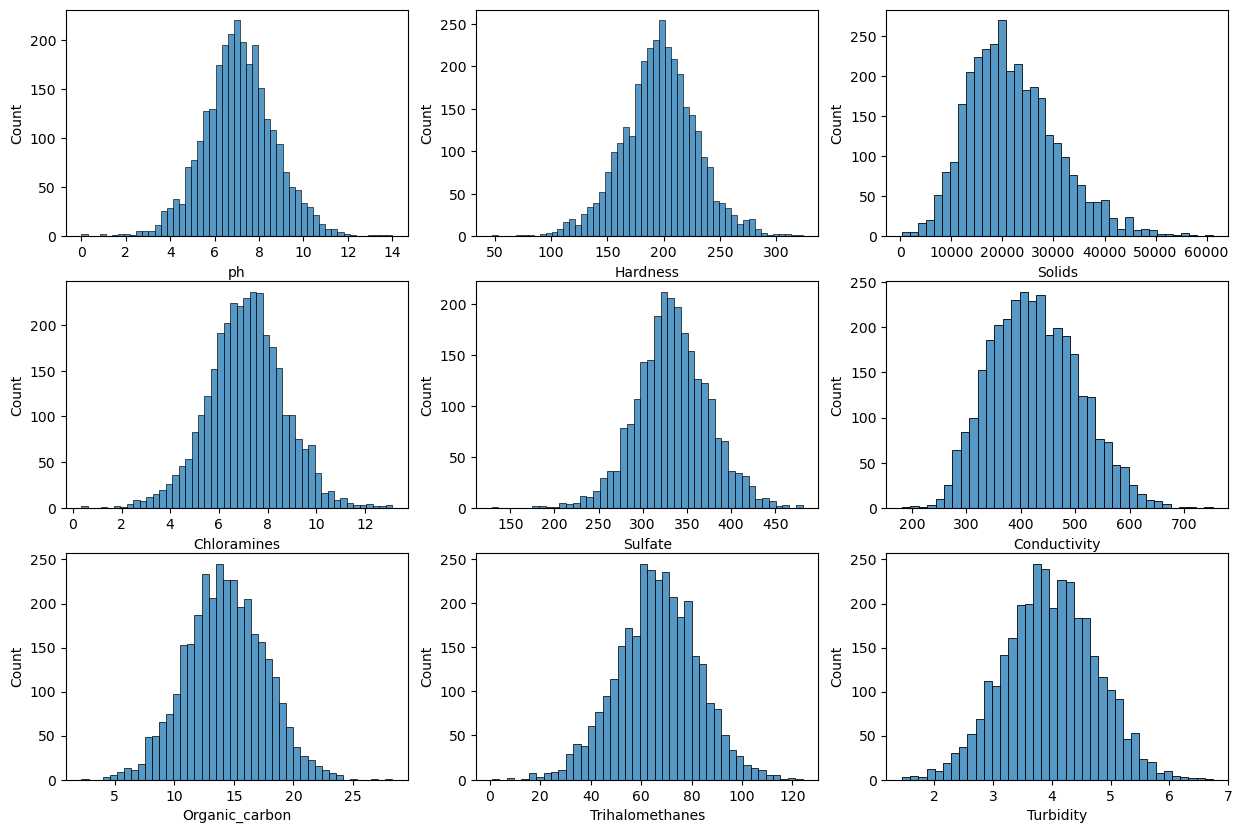

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(15,10))
i=1
for feature in df.columns:
    if feature not in ["Potability"] and i < 10:
        plt.subplot(3,3,i)
        sns.histplot(data=df, x=feature)
        i+=1

Text(0.5, 1.0, 'Count plot of Potability')

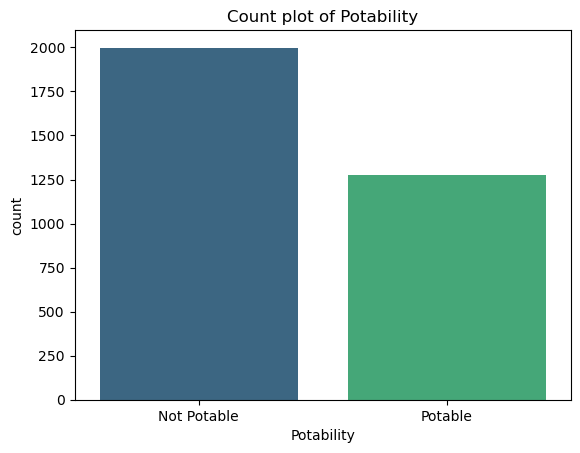

In [9]:
sns.countplot(x=df['Potability'], data=df, palette='viridis')
plt.title('Count plot of Potability')

In [10]:
cond = df['Potability']=='Not Potable'

df['ph'].fillna(cond.map({True:df.loc[df['Potability']=='Not Potable']['ph'].median(),
                                False:df.loc[df['Potability']=='Potable']['ph'].median()
                                }),inplace=True)

df['Sulfate'].fillna(cond.map({True:df.loc[df['Potability']=='Not Potable']['Sulfate'].median(),
                                False:df.loc[df['Potability']=='Potable']['Sulfate'].median()
                                }),inplace=True)

df['Trihalomethanes'].fillna(cond.map({True:df.loc[df['Potability']=='Not Potable']['Trihalomethanes'].median(),
                                False:df.loc[df['Potability']=='Potable']['Trihalomethanes'].median()
                                }),inplace=True)

In [11]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
def detect_outliers(df):
    outliers = {}
    
    for col in df.select_dtypes(include=['float64', 'int64']):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers[col] = df[col][outlier_mask]
        
    return outliers

# Example usage:
outliers = detect_outliers(df)
for col, outlier_data in outliers.items():
    print(f"Outliers in {col}:\n{outlier_data}\n")

Outliers in ph:
1        3.716080
9       11.180284
26       3.445062
32      10.433291
36       3.641630
          ...    
3233    10.485604
3246    10.667364
3249    10.808157
3261     3.629922
3269    11.491011
Name: ph, Length: 142, dtype: float64

Outliers in Hardness:
18      279.357167
37      304.235912
51      100.457615
67      103.464759
71      116.299330
           ...    
3218    287.975540
3221    303.702627
3230    114.807578
3244    277.065713
3269     94.812545
Name: Hardness, Length: 83, dtype: float64

Outliers in Solids:
142     46140.12685
186     45222.50667
283     48621.56395
287     46113.95749
366     52318.91730
378     45249.44903
405     46931.88429
516     45510.58432
546     49074.73041
613     44868.45837
666     52060.22680
987     48002.08460
1031    56867.85924
1068    55334.70280
1077    48410.47101
1096    45141.68604
1186    56351.39630
1302    44896.98411
1332    45166.91214
1343    48204.17219
1445    45166.63939
1462    45939.68916
1527    4671

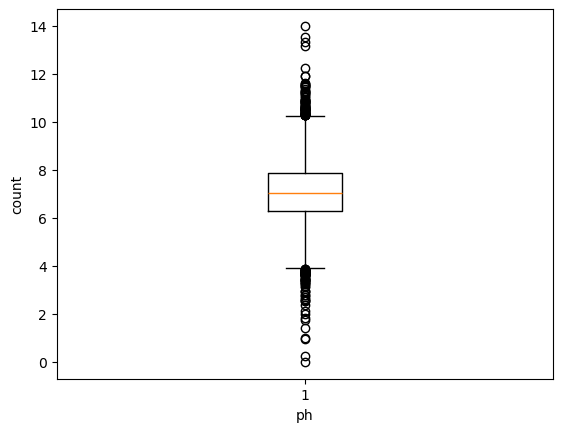

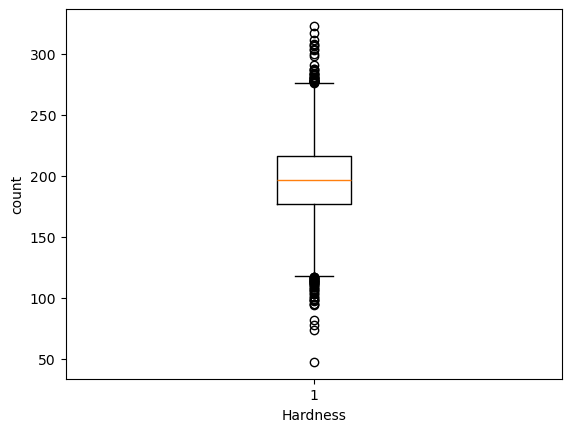

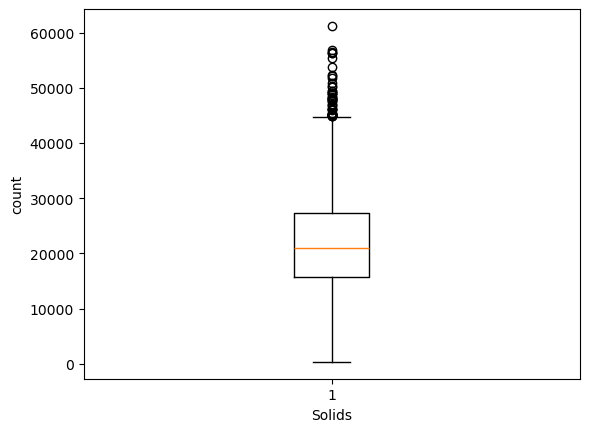

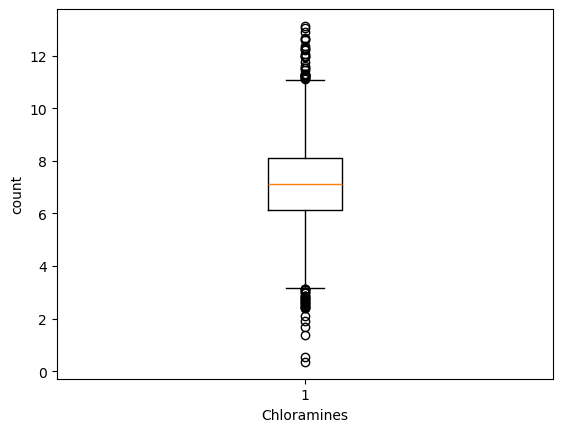

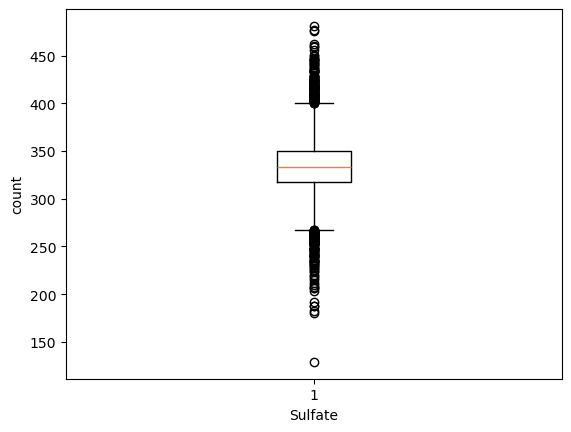

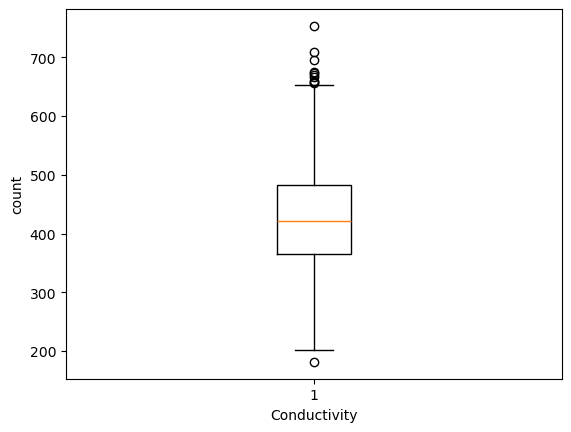

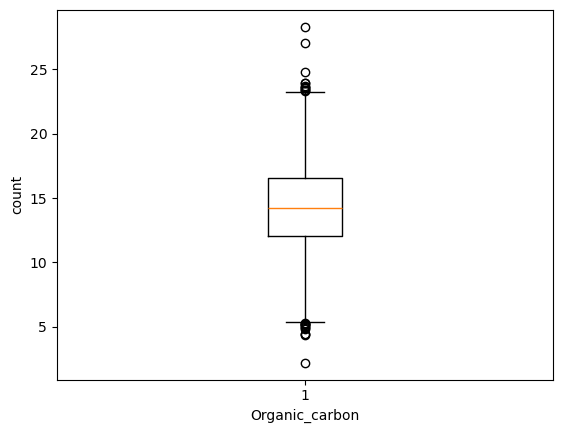

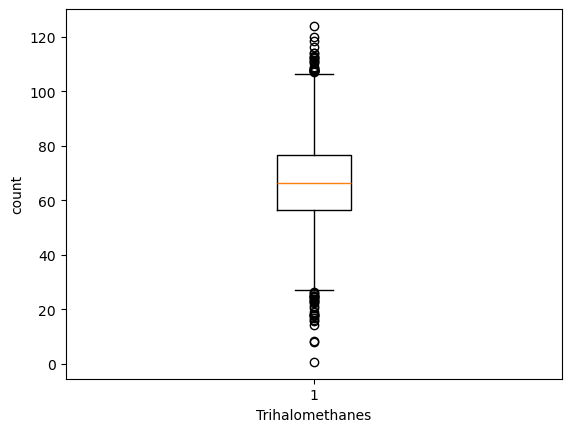

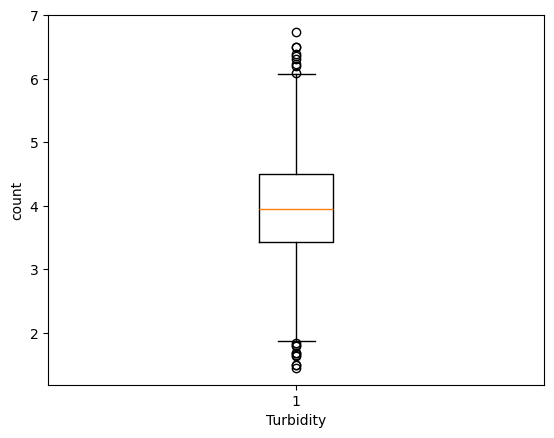

In [13]:
for col_name in df:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [14]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [15]:
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    df[col] = np.where(df[col] > upper_whisker, upper_whisker, 
                       np.where(df[col] < lower_whisker, lower_whisker, df[col]))

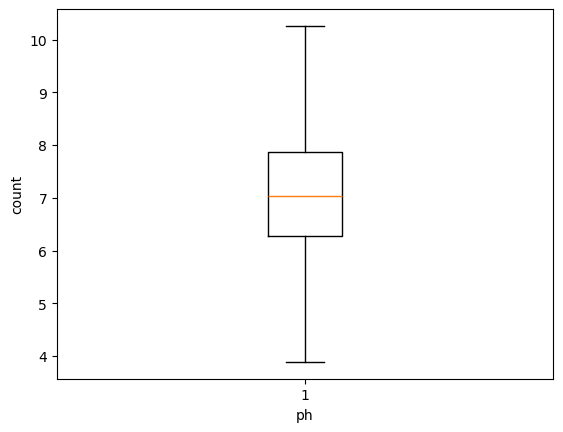

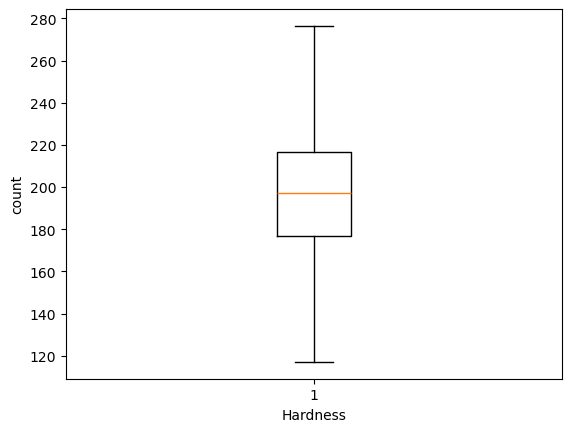

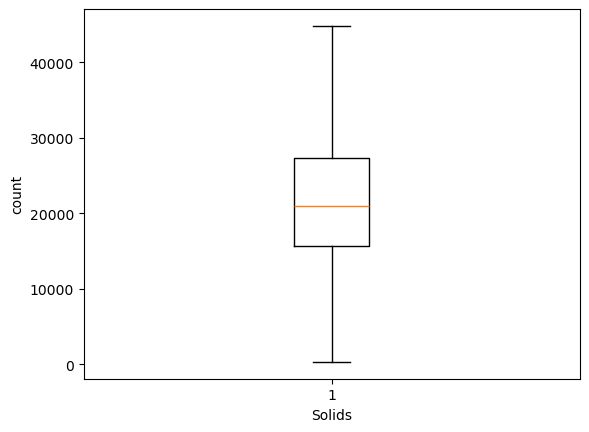

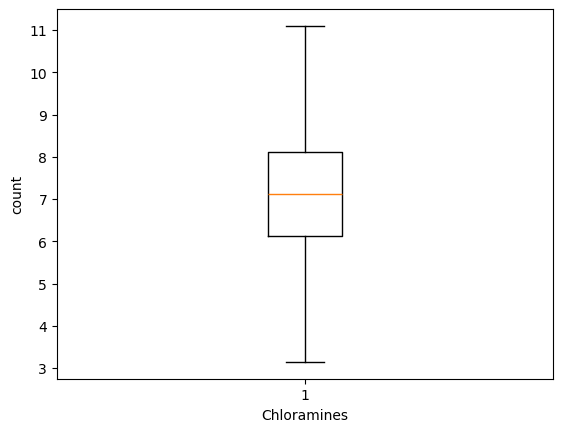

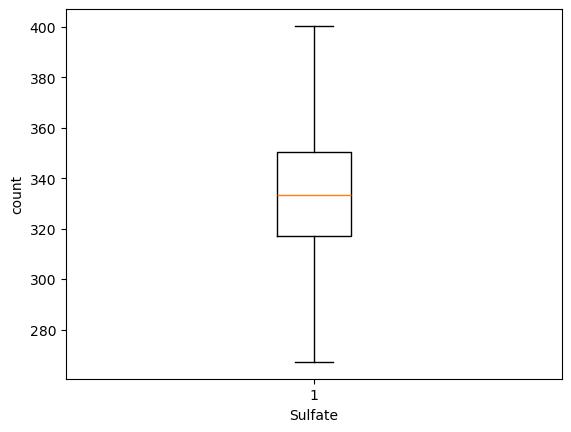

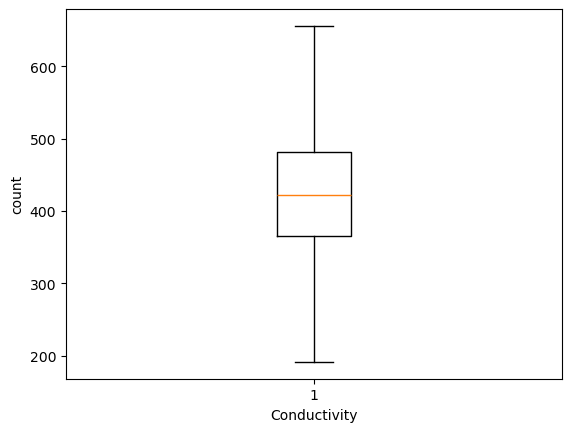

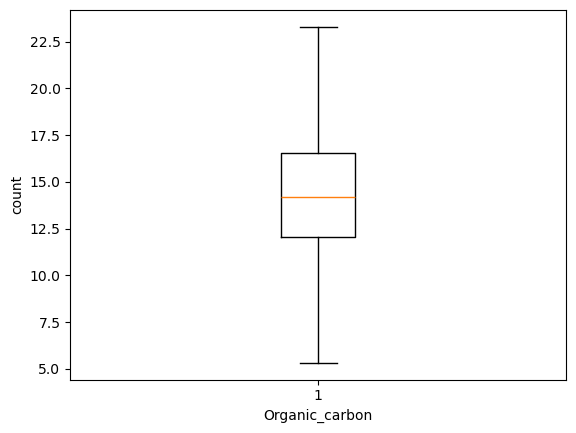

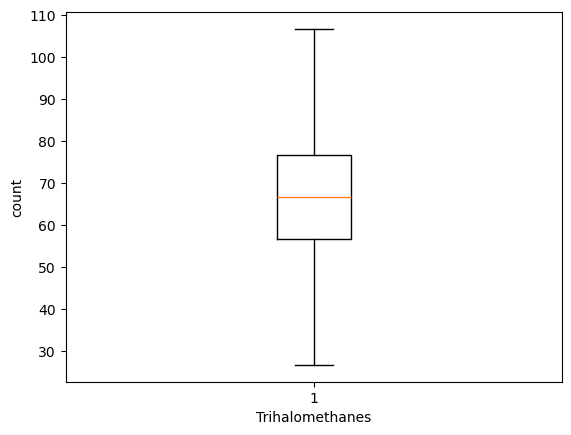

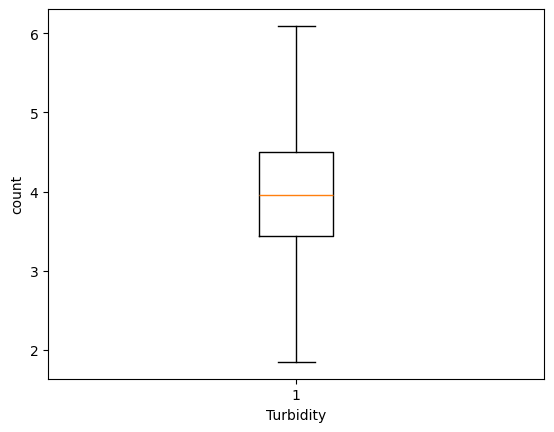

In [16]:
for col_name in df:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

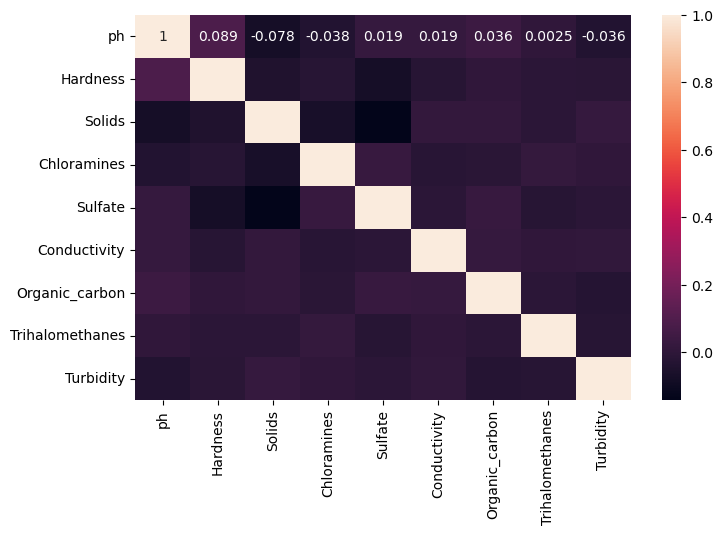

In [17]:
plt.figure(figsize =(8,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Potability'] = le.fit_transform(df['Potability'])

In [19]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.035456,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.889107,129.422921,18630.05786,6.635246,333.389426,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.389426,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [20]:
X=df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y=df['Potability']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()

In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [28]:
lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [29]:
y_pred_lr = lr.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report

In [31]:
acc_lr = accuracy_score(y_test, y_pred_lr)
print('Logistic Regression accuracy score: ' ,acc_lr)

Logistic Regression accuracy score:  0.6280487804878049


In [32]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



C:\Users\divya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Classifier

In [33]:
from sklearn.svm import SVC

In [34]:
sv = SVC(random_state=0)

In [35]:
sv.fit(X_train, y_train)

SVC(random_state=0)

In [36]:
y_pred_sv = sv.predict(X_test)

In [37]:
acc_sv = accuracy_score(y_test, y_pred_sv)
print('SVM Model accuracy score: ' ,acc_sv)

SVM Model accuracy score:  0.6753048780487805


In [38]:
print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78       412
           1       0.66      0.27      0.38       244

    accuracy                           0.68       656
   macro avg       0.67      0.59      0.58       656
weighted avg       0.67      0.68      0.63       656



### K-Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=4)

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [42]:
y_pred_knn = knn.predict(X_test)

In [43]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print('KNN accuracy score: ' ,acc_knn)

KNN accuracy score:  0.6371951219512195


In [44]:
k_values = range (1,20)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_knn))

print(scores)

[0.5945121951219512, 0.6326219512195121, 0.625, 0.6371951219512195, 0.6112804878048781, 0.6387195121951219, 0.6219512195121951, 0.6341463414634146, 0.6280487804878049, 0.6509146341463414, 0.635670731707317, 0.649390243902439, 0.649390243902439, 0.6463414634146342, 0.6417682926829268, 0.6478658536585366, 0.6387195121951219, 0.6463414634146342, 0.6417682926829268]


Text(0, 0.5, 'Accuracy Score')

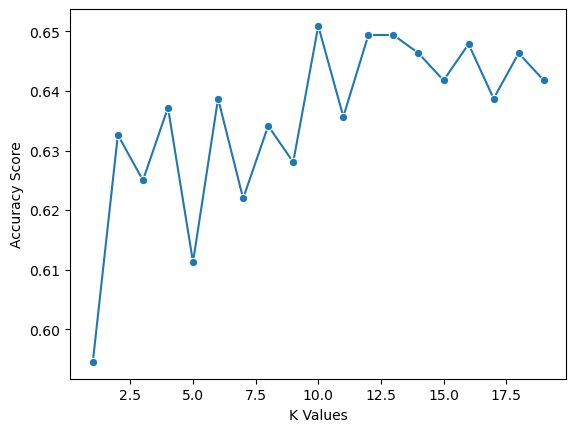

In [45]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [46]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

In [47]:
knn = KNeighborsClassifier(n_neighbors=best_k)

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [49]:
y_pred_knn = knn.predict(X_test)

In [50]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print('KNN Model accuracy score with best K: ' ,acc_knn)

KNN Model accuracy score with best K:  0.6509146341463414


In [51]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       412
           1       0.57      0.25      0.34       244

    accuracy                           0.65       656
   macro avg       0.62      0.57      0.55       656
weighted avg       0.63      0.65      0.61       656



### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt = DecisionTreeClassifier()

In [54]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
y_pred_dt = dt.predict(X_test)

In [56]:
acc_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Model accuracy score: ' ,acc_dt)

Decision Tree Model accuracy score:  0.7362804878048781


In [57]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       412
           1       0.64      0.66      0.65       244

    accuracy                           0.74       656
   macro avg       0.72      0.72      0.72       656
weighted avg       0.74      0.74      0.74       656



### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc = RandomForestClassifier(random_state=0)

In [60]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [61]:
y_pred_rfc = rfc.predict(X_test)

In [62]:
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print('Random Forest Model accuracy score: ' ,acc_rfc)

Random Forest Model accuracy score:  0.8033536585365854


In [63]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       412
           1       0.81      0.61      0.70       244

    accuracy                           0.80       656
   macro avg       0.81      0.76      0.78       656
weighted avg       0.80      0.80      0.80       656



### XGBoosting

In [64]:
from xgboost import XGBClassifier

In [65]:
xgbc = XGBClassifier()

In [66]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
y_pred_xgbc = xgbc.predict(X_test)

In [68]:
acc_xgbc = accuracy_score(y_test, y_pred_xgbc)
print('XGB Classifier accuracy score: ' ,acc_xgbc)

XGB Classifier accuracy score:  0.7759146341463414


In [69]:
print(classification_report(y_test, y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       412
           1       0.73      0.63      0.68       244

    accuracy                           0.78       656
   macro avg       0.76      0.75      0.75       656
weighted avg       0.77      0.78      0.77       656



### Hyperparameter tuning

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
params = {'n_estimators' : [10, 100, 250, 500],
          'criterion': ['gini', 'entropy'],
          'max_depth' : [1, 5, 10, 25], 
          'min_samples_split' : [2, 5, 10],
          'min_samples_leaf' : [1, 5, 10]
          }

In [72]:
grid_search_rf= GridSearchCV(estimator=rfc, param_grid=params,
                           cv=5, n_jobs = -1)

In [73]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 25],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 250, 500]})

In [74]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [75]:
best_model = grid_search_rf.best_estimator_
y_pred_gs = best_model.predict(X_test)

In [76]:
accuracy_gs_rf = round(accuracy_score(y_test, y_pred_gs),2)
accuracy_gs_rf

0.8

### Model Comparison

In [77]:
models = ['Logistic Regresson','SVM','Decision Tree', 'Random Forest', 'KNN', 'XGBoosting']
Acc_Score = [acc_lr, acc_sv, acc_dt, acc_rfc, acc_knn, acc_xgbc]
Acc_Score1 = [f'{i*100: .2f}%' for i in Acc_Score]

models_score = pd.DataFrame({
    'Model' : models,
    'Accuracy_Score' : Acc_Score1
})

models_score

,Model,Accuracy_Score
0,Logistic Regresson,62.80%
1,SVM,67.53%
2,Decision Tree,73.63%
3,Random Forest,80.34%
4,KNN,65.09%
5,XGBoosting,77.59%
